In [1]:
import numpy as np
np.set_printoptions(precision = 3)
import pandas as pd
pd.set_option('display.precision',3)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('whitegrid')

In [2]:
happy = pd.read_csv('C:/ESC2020_spring/finalproject/Seoul_Happiness_2014_train.csv',thousands = ',')

# Problem Setting and EDA

In [3]:
from IPython.display import Image
# Image(filename="C:/ESC2020_spring/finalproject/description.png",width=1500,height=1500)  ## 실행이 안돼서 잠시 예외처리했습니다!

### Project Steps

1) EDA : 각 변수들의 상호 연관성, outlier, 각 변수들의 분포 (plain, bell, skewed, lots of NA's(무응답))

2) Prediction  : Q4B 단일변수 (**정규성 가정 만족 ?? 아님 변환?? 혹은 GLM??**)

3) 정책적 제언 : 구별 특징 두드러지면 mapping  + **문항에 대한 보완점**

### 짚고 넘어갈 주의점들

- NA가 많다! NA가 없는 데이터라고 학술부장께서 얘기한 거는 필요한 코딩이 다 완료되었다는 것.

  1) 연결문항으로 인해 답하지 않아도 되는 문항들은 다 NA(빔)
  
  2) 무응답이여서 99/9로 코딩된 것들 : NA가 아니지만 사실상 NA. 1)의 실제 NA랑 비교 위해 '무응답'으로 표시

- Y변수에 무응답이 있는 record는 삭제해야!

- 연결문항에 대해 어떻게 할지 !!!! 

- 1순위, 2순위들 ( Q14,17,19,21,25,31)

- **같은 카테고리 안의 문항들 사이의 수치적 연관성!**


### EDA 순서

1) 먼저, data glimpse 없이도 없애버릴 수 있는 변수들 제거!

2) 일단 어떤 변수들에 NA가 있는지 확인! -> **각 변수별로 무응답 돌아다니며 탐구 및 처리 !**

(말했지만 무응답이 많다! 결측치 처리법들을 참고해 무응답들을 처리하자! 가령, 변수 제거 / median or mean으로 대체)

3) 변수 Type 확인 및 정리 : numeric /ordinal(박사석사대졸등등) / nominal(종교)

4) 각 변수들의 분포 파악

5) Outlier 제거? 남김?

6) 각 설명변수들끼리의 상호 연관성





1 - 행정구역 : nominal

2 - Fam 1 - Fam2 : 집에 15세 미만이 몇명?

3 - Fam 2 : 15세 이상   -  다중공선성 문제 x 이유는 전체 가구원 수가 다르므로

4 - HTYP : NOMINAL

5 - HLIV : NOMINAL

6 - INC : NUMERIC 50 100 150 200 ... 900이상 -> 900이상에서 문제가 발생!

        : ORDINAL 여기서는 정보손실이 있으나 900만원 이상에 대한 문제가 X : ORDINAL!!!!!!!
        
7 - REL : NOMINAL

8 - JEN : NOMINAL

9 : MAR : NOMINAL - 기타! 를 NA로 처리할지?

10 : RLI : NOMINAL (7~99 없음)

11 : FC : 변수 삭제 

12 : NUMERICAL ->2014에서 빼서 + 1

13 : Q1 : NOMINAL 그대로

14 : Q2 : ORDINAL 

15 : Q2A &B 합쳐 : 0(경험없음) 12345 NOMINAL(ORDINAL 큰일!)

16 : Q3 : 어느 모임이나 단체에도 참여한 적 없다 / 뭐라도 했다 이것만! (Q3A1 ~ Q3A11을 녹인다!) 

단, 외향성 변수는 아님! 이들 중 아무것도 안했어도 외향적일수도

17 : Q5 모두 살려놓고 ORDINAL

18 : Q6 다 살려놓거나 EDA에서 묶을 수 있는거 보자 ORDINAL

19 : Q7 ORDINAL

20 : Q8 ORDINAL -> Q7,8도 EDA에서 다중공선성 심하면 하나로 합쳐

21 : Q9 ORDINAL

22 : Q10(실천도 변수들) : ORDINAL (9 빼고 평균)

23 : Q11 : ORDINAL

24 : Q12 : EDA 이후 분야별로 합칠 수 있으면 합치기!

    Q 12-I -1만 쓰기
    
25 : Q13 , Q13 1 둘 다 남기고 공선성 크면 하나만

26 : Q14 : 여기 기타는 남겨두기, 무응답은 전 답과 같게

27 : Q15 : ORDINAL

Q16 : 없애고 Q16A를 살려, Q16 : 2면 0으로

Q17 : 3순위 정보 없앤다!, 2순위의 NA를 1순위랑 똑같이 한다 (2순위 NA인 사람은 3순위도 NA이다. 똑같은거 3가지로 하기 그렇잖아)

Q18 : NOMINAL

Q19 : 여기 기타는 남겨두기, 무응답은 전 답과 같게

Q20 만 살린다 ! 1,2를 없앤다 결측치가 10000대 /10000대여서

Q21 : 받았다 안받았다만!! 

Q21-1 : 3순위 정보 없앤다!, 2순위의 NA를 1순위랑 똑같이 한다 (2순위 NA인 사람은 3순위도 NA이다. 똑같은거 3가지로 하기 그렇잖아)


Q22 : ORDINAL

Q23 : Q12처럼 한다.

Q24 : 24만 하고 작은 문제들 삭제

Q25 : 땡겨쓰기

Q26 : 있다 없다

Q27 : ORDINAL

Q28 : ORDINAL

Q29 : 분포 보고 다르면 각각 쓰고 비슷하면 평균

Q30 : 분포 보고 다르면 각각 쓰고 비슷하면 평균

Q31 : 땡겨쓰기

Q32 : 분포 보고 다르면 각각 쓰고 비슷하면 평균

Q33: 분포 보고 다르면 각각 쓰고 비슷하면 평균

Q34 : NUMERICAL

Q35 : ORDINAL, 34와 공선성 보고 비슷하면 합치기

Q36 : 분포 보고 다르면 각각 쓰고 비슷하면 평균

Q37 : ORDINAL

Q38 : NOMINAL

Q39 : NOMINAL

Q40 : ORDINAL

Q41 : ORDINAL로 쓸거면 변환을 해야! (보수적인 정도로 변수 이름짓기)

Q42 : 42-2를 뺀 이유는 나중에 다루기 때문에. 통학 안하는 사람때문이 있어서도. **통근시간만 살려** 

**시, 분 변환**

Q43 : 분포 보고 다르면 각각 쓰고 비슷하면 평균

Q44 : NOMINAL, 삭제

Q44 -1 삭제

### Q45: 이번주는 평균치로 하고 다음주는 regression imputation.

Q46 : 평균 (살린다)

### Q47) ZOOM으로 생각하는걸로 하자! 

작은 1,2번 넘어가고 

Q48 : 6번문제처럼 ORDINAL

Q49 : 6번문제처럼 ORDINAL

DE 1, 2, 3, 5, 6, 7(안쓸가능성높음), 9는 쓴다!!!! 

### DE 1,2,3,5,6,7(안쓸가능성높음),9 쓰고 이에 해당하는 위의 문항들을 지운다!

### DE 4, DE8은 안쓰고 위에껄 쓴다

RDQ 1 : ORDINAL

RDQ 2 : ORDINAL




# EDA

## 1) 의미상 아무 의미 없는 원가중치, 표준화가중치, 기본값 (wtb1,wtb2,X)제거



In [4]:
happy.shape

(31848, 198)

In [5]:
happy = happy.drop(['X','wtb1','wtb2'], axis = 1) 
happy.head()

,GU,FAM1,FAM2,HTYP,HLIV,INC,REL,JEN,MAR,RLI,...,JOB,DE1,DE2,DE3,DE4,DE5,DE6,DE7,DE8,DE9
0,680,2,2,2,1,5,1,1,1,6,...,5,1.0,6.0,2.0,3.0,1.0,680.0,5.0,2.0,3.0
1,680,2,2,2,1,5,2,2,1,6,...,11,2.0,6.0,2.0,3.0,1.0,680.0,5.0,4.0,4.0
2,680,5,5,2,1,11,3,2,2,6,...,3,2.0,2.0,3.0,6.0,2.0,680.0,5.0,3.0,2.0
3,680,5,5,2,1,11,3,2,2,6,...,10,2.0,1.0,3.0,6.0,2.0,680.0,5.0,3.0,4.0
4,680,5,5,2,1,11,3,1,2,6,...,10,1.0,1.0,1.0,6.0,2.0,680.0,5.0,3.0,4.0


## 2) 박태석 : 분포보고 묶기

- 대상문항 : 29, 30, 32, 33, 36-1, 43, 46

       Q29A1  Q29A2  Q29A3  Q29A4
Q29A1  1.000  0.169  0.164  0.201
Q29A2  0.169  1.000  0.203  0.168
Q29A3  0.164  0.203  1.000  0.276
Q29A4  0.201  0.168  0.276  1.000


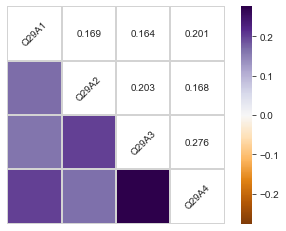

In [6]:
# Q 29

# Compute the correlation matrix
corr29 = happy[['Q29A1', 'Q29A2', 'Q29A3', 'Q29A4']].corr() # corr값 계산하고
print(corr29)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr29, dtype=np.bool) # Upper triangular로 만드는거라네요
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots()

# Draw the heatmap with the mask and correct aspect ratio
vmax = np.abs(corr29.values[~mask]).max()
sns.heatmap(corr29, mask=mask, cmap=plt.cm.PuOr, vmin=-vmax, vmax=vmax,
            square=True, linecolor="lightgray", linewidths=1, ax=ax)
for i in range(len(corr29)): # 위치 조절
    ax.text(i+0.5,(i+0.5), corr29.columns[i], 
            ha="center", va="center", rotation=45)
    for j in range(i+1, len(corr29)):
        s = "{:.3f}".format(corr29.values[i,j])
        ax.text(j+0.5,i+0.5,s, 
            ha="center", va="center")
ax.axis("off")
plt.show()

       Q30A1  Q30A2  Q30A3  Q30A4  Q30A5
Q30A1  1.000  0.247 -0.052 -0.091  0.108
Q30A2  0.247  1.000  0.379  0.271  0.229
Q30A3 -0.052  0.379  1.000  0.679  0.203
Q30A4 -0.091  0.271  0.679  1.000  0.235
Q30A5  0.108  0.229  0.203  0.235  1.000


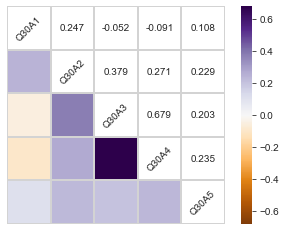

In [7]:
# Q 30

# Compute the correlation matrix
corr30 = happy[['Q30A1', 'Q30A2', 'Q30A3', 'Q30A4', 'Q30A5']].corr() # corr값 계산하고
print(corr30)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr30, dtype=np.bool) # Upper triangular로 만드는거라네요
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots()

# Draw the heatmap with the mask and correct aspect ratio
vmax = np.abs(corr30.values[~mask]).max()
sns.heatmap(corr30, mask=mask, cmap=plt.cm.PuOr, vmin=-vmax, vmax=vmax,
            square=True, linecolor="lightgray", linewidths=1, ax=ax)
for i in range(len(corr30)): # 위치 조절
    ax.text(i+0.5,(i+0.5), corr30.columns[i], 
            ha="center", va="center", rotation=45)
    for j in range(i+1, len(corr30)):
        s = "{:.3f}".format(corr30.values[i,j])
        ax.text(j+0.5,i+0.5,s, 
            ha="center", va="center")
ax.axis("off")
plt.show()

# 3번과 4번은 같은 문항으로 합쳐도 될 듯!

       Q32A1  Q32A2  Q32A3  Q32A4  Q32A5  Q32A6  Q32A7
Q32A1  1.000  0.475  0.243  0.284  0.234  0.181  0.167
Q32A2  0.475  1.000  0.293  0.267  0.298  0.205  0.187
Q32A3  0.243  0.293  1.000  0.320  0.268  0.356  0.270
Q32A4  0.284  0.267  0.320  1.000  0.316  0.226  0.234
Q32A5  0.234  0.298  0.268  0.316  1.000  0.365  0.279
Q32A6  0.181  0.205  0.356  0.226  0.365  1.000  0.434
Q32A7  0.167  0.187  0.270  0.234  0.279  0.434  1.000


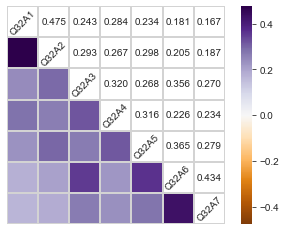

In [8]:
# Q 32

# Compute the correlation matrix
corr32 = happy[['Q32A1', 'Q32A2', 'Q32A3', 'Q32A4', 'Q32A5', 'Q32A6', 'Q32A7']].corr() # corr값 계산하고
print(corr32)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr32, dtype=np.bool) # Upper triangular로 만드는거라네요
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots()

# Draw the heatmap with the mask and correct aspect ratio
vmax = np.abs(corr32.values[~mask]).max()
sns.heatmap(corr32, mask=mask, cmap=plt.cm.PuOr, vmin=-vmax, vmax=vmax,
            square=True, linecolor="lightgray", linewidths=1, ax=ax)
for i in range(len(corr32)): # 위치 조절
    ax.text(i+0.5,(i+0.5), corr32.columns[i], 
            ha="center", va="center", rotation=45)
    for j in range(i+1, len(corr32)):
        s = "{:.3f}".format(corr32.values[i,j])
        ax.text(j+0.5,i+0.5,s, 
            ha="center", va="center")
ax.axis("off")
plt.show()

# 1번과 2번, 1번과 7번이 꽤 높다.

       Q33A1  Q33A2  Q33A3  Q33A4  Q33A5  Q33A6  Q33A7  Q33A8  Q33A9
Q33A1  1.000  0.477  0.229  0.205  0.208  0.231  0.277  0.212  0.234
Q33A2  0.477  1.000  0.333  0.205  0.236  0.263  0.267  0.236  0.240
Q33A3  0.229  0.333  1.000  0.341  0.196  0.253  0.183  0.248  0.149
Q33A4  0.205  0.205  0.341  1.000  0.451  0.245  0.252  0.243  0.189
Q33A5  0.208  0.236  0.196  0.451  1.000  0.325  0.247  0.221  0.242
Q33A6  0.231  0.263  0.253  0.245  0.325  1.000  0.355  0.248  0.248
Q33A7  0.277  0.267  0.183  0.252  0.247  0.355  1.000  0.257  0.315
Q33A8  0.212  0.236  0.248  0.243  0.221  0.248  0.257  1.000  0.350
Q33A9  0.234  0.240  0.149  0.189  0.242  0.248  0.315  0.350  1.000


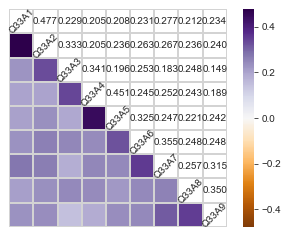

       Q33A1  Q33A2  Q33A3  Q33A4  Q33A5  Q33A6  Q33A7  Q33A8  Q33A9
Q33A1  1.000  0.477    NaN    NaN    NaN    NaN    NaN    NaN    NaN
Q33A2  0.477  1.000    NaN    NaN    NaN    NaN    NaN    NaN    NaN
Q33A3    NaN    NaN    1.0    NaN    NaN    NaN    NaN    NaN    NaN
Q33A4    NaN    NaN    NaN  1.000  0.451    NaN    NaN    NaN    NaN
Q33A5    NaN    NaN    NaN  0.451  1.000    NaN    NaN    NaN    NaN
Q33A6    NaN    NaN    NaN    NaN    NaN    1.0    NaN    NaN    NaN
Q33A7    NaN    NaN    NaN    NaN    NaN    NaN    1.0    NaN    NaN
Q33A8    NaN    NaN    NaN    NaN    NaN    NaN    NaN    1.0    NaN
Q33A9    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    1.0


In [9]:
# Q 33

# Compute the correlation matrix
corr33 = happy[['Q33A1', 'Q33A2', 'Q33A3', 'Q33A4', 'Q33A5', 'Q33A6', 'Q33A7', 'Q33A8', 'Q33A9',]].corr() # corr값 계산하고
print(corr33)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr33, dtype=np.bool) # Upper triangular로 만드는거라네요
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots()

# Draw the heatmap with the mask and correct aspect ratio
vmax = np.abs(corr33.values[~mask]).max()
sns.heatmap(corr33, mask=mask, cmap=plt.cm.PuOr, vmin=-vmax, vmax=vmax,
            square=True, linecolor="lightgray", linewidths=1, ax=ax)
for i in range(len(corr33)): # 위치 조절
    ax.text(i+0.5,(i+0.5), corr33.columns[i], 
            ha="center", va="center", rotation=45)
    for j in range(i+1, len(corr33)):
        s = "{:.3f}".format(corr33.values[i,j])
        ax.text(j+0.5,i+0.5,s, 
            ha="center", va="center")
ax.axis("off")
plt.show()

print(corr33[corr33>0.4])
#1번과 2번, 4번과 5번이 꽤 높은 것으로 확인!

       Q36A1  Q36A2
Q36A1   1.00   0.56
Q36A2   0.56   1.00


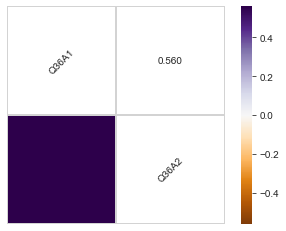

In [10]:
# Q 36-1

# Compute the correlation matrix
corr36_1 = happy[['Q36A1', 'Q36A2']].corr() # corr값 계산하고
print(corr36_1)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr36_1, dtype=np.bool) # Upper triangular로 만드는거라네요
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots()

# Draw the heatmap with the mask and correct aspect ratio
vmax = np.abs(corr36_1.values[~mask]).max()
sns.heatmap(corr36_1, mask=mask, cmap=plt.cm.PuOr, vmin=-vmax, vmax=vmax,
            square=True, linecolor="lightgray", linewidths=1, ax=ax)
for i in range(len(corr36_1)): # 위치 조절
    ax.text(i+0.5,(i+0.5), corr36_1.columns[i], 
            ha="center", va="center", rotation=45)
    for j in range(i+1, len(corr36_1)):
        s = "{:.3f}".format(corr36_1.values[i,j])
        ax.text(j+0.5,i+0.5,s, 
            ha="center", va="center")
ax.axis("off")
plt.show()

# 얘네 두개는 합쳐도 될 것 같다!

       Q43A1  Q43A2
Q43A1  1.000  0.531
Q43A2  0.531  1.000


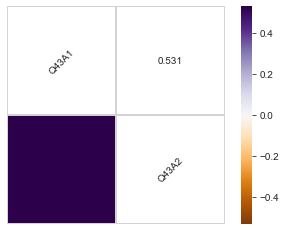

In [11]:
# Q 43

# Compute the correlation matrix
corr43 = happy[['Q43A1', 'Q43A2']].corr() # corr값 계산하고
print(corr43)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr43, dtype=np.bool) # Upper triangular로 만드는거라네요
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots()

# Draw the heatmap with the mask and correct aspect ratio
vmax = np.abs(corr43.values[~mask]).max()
sns.heatmap(corr43, mask=mask, cmap=plt.cm.PuOr, vmin=-vmax, vmax=vmax,
            square=True, linecolor="lightgray", linewidths=1, ax=ax)
for i in range(len(corr43)): # 위치 조절
    ax.text(i+0.5,(i+0.5), corr43.columns[i], 
            ha="center", va="center", rotation=45)
    for j in range(i+1, len(corr43)):
        s = "{:.3f}".format(corr43.values[i,j])
        ax.text(j+0.5,i+0.5,s, 
            ha="center", va="center")
ax.axis("off")
plt.show()

# 얘네도 합쳐도 될 듯!

       Q46A1  Q46A2  Q46A3  Q46A4  Q46A5
Q46A1  1.000  0.365  0.335  0.295  0.319
Q46A2  0.365  1.000  0.422  0.340  0.423
Q46A3  0.335  0.422  1.000  0.363  0.390
Q46A4  0.295  0.340  0.363  1.000  0.415
Q46A5  0.319  0.423  0.390  0.415  1.000


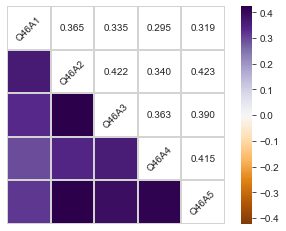

In [12]:
# Q 46

# Compute the correlation matrix
corr46 = happy[['Q46A1', 'Q46A2', 'Q46A3', 'Q46A4', 'Q46A5']].corr() # corr값 계산하고
print(corr46)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr46, dtype=np.bool) # Upper triangular로 만드는거라네요
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots()

# Draw the heatmap with the mask and correct aspect ratio
vmax = np.abs(corr46.values[~mask]).max()
sns.heatmap(corr46, mask=mask, cmap=plt.cm.PuOr, vmin=-vmax, vmax=vmax,
            square=True, linecolor="lightgray", linewidths=1, ax=ax)
for i in range(len(corr46)): # 위치 조절
    ax.text(i+0.5,(i+0.5), corr46.columns[i], 
            ha="center", va="center", rotation=45)
    for j in range(i+1, len(corr46)):
        s = "{:.3f}".format(corr46.values[i,j])
        ax.text(j+0.5,i+0.5,s, 
            ha="center", va="center")
ax.axis("off")
plt.show()


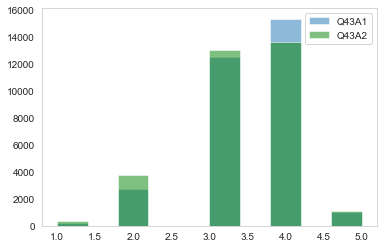

In [13]:
plt.hist(happy['Q43A1'], rwidth=5, alpha=0.5, label='Q43A1')
plt.hist(happy['Q43A2'], rwidth=5, color='green', alpha=0.5, label='Q43A2')
plt.grid()
plt.legend()

In [14]:
# 30번의 3번과 4번 평균값 구하기

Q30Mean34 = np.zeros(happy.shape[0])
for i in np.arange(happy.shape[0]):
    Q30Mean34[i] = np.mean([happy['Q30A3'][i], happy['Q30A4'][i]])
Q30Mean34

array([3. , 3. , 1.5, ..., 1. , 1. , 1. ])

In [15]:
# 32번의 1번과 2번 평균값 구하기

Q32Mean12 = np.zeros(happy.shape[0])
for i in np.arange(happy.shape[0]):
    Q32Mean12[i] = np.mean([happy['Q32A1'][i], happy['Q32A2'][i]])
Q32Mean12

array([2. , 2.5, 2. , ..., 1.5, 1.5, 1.5])

In [16]:
# 32번의 6번과 7번 평균값 구하기

Q32Mean67 = np.zeros(happy.shape[0])
for i in np.arange(happy.shape[0]):
    Q32Mean67[i] = np.mean([happy['Q32A6'][i], happy['Q32A7'][i]])
Q32Mean67

array([3. , 2.5, 4.5, ..., 3. , 3.5, 3.5])

In [17]:
# 33번의 1번과 2번 평균값 구하기

Q33Mean12 = np.zeros(happy.shape[0])
for i in np.arange(happy.shape[0]):
    Q33Mean12[i] = np.mean([happy['Q33A1'][i], happy['Q33A2'][i]])
Q33Mean12

array([3.5, 3.5, 1. , ..., 2.5, 2. , 2. ])

In [18]:
# 33번의 4번과 5번 평균값 구하기

Q33Mean45 = np.zeros(happy.shape[0])
for i in np.arange(happy.shape[0]):
    Q33Mean45[i] = np.mean([happy['Q33A4'][i], happy['Q33A5'][i]])
Q33Mean45

array([4. , 4.5, 3. , ..., 1.5, 2. , 2. ])

In [19]:
# 36번 평균값 구하기

Q36Mean = np.zeros(happy.shape[0])
for i in np.arange(happy.shape[0]):
    Q36Mean[i] = np.mean([happy['Q36A1'][i], happy['Q36A2'][i]])
Q36Mean

array([2. , 2. , 4. , ..., 1.5, 3. , 1.5])

In [20]:
# 43번 평균값 구하기

Q43Mean = np.zeros(happy.shape[0])
for i in np.arange(happy.shape[0]):
    Q43Mean[i] = np.mean([happy['Q43A1'][i], happy['Q43A2'][i]])
Q43Mean

array([3.5, 4. , 4. , ..., 3.5, 4. , 4. ])

In [21]:
# 46번의 2번, 3번, 5번문항의 평균값 구하기

Q46Mean235 = np.zeros(happy.shape[0])
for i in np.arange(happy.shape[0]):
    Q46Mean235[i] = np.mean([happy['Q46A2'][i], happy['Q46A3'][i], happy['Q46A5'][i]])
Q46Mean235

array([4.333, 4.667, 4.   , ..., 3.667, 5.   , 5.   ])

## 3) 임선우 역할 : 이가은 회원의 NA 처리한 것에 맞춰 변수 삭제 &수치형변수들 다루기 (skewness, normality 등등)

### 삭제문항 

- 1) Q12A2,Q12B2,Q12C2,Q12D2,Q12E2,Q12F2,Q12G2,Q12H2 (Q12A1,A12B1,...는 다 다 더한다음에 문화생활 총횟수의 의미를 만들고 난 다음에 삭제) 

- Q16(있다없다를 지우고 Q16A 방문횟수만남김)

- Q17A3

- Q21A1,Q21A2,Q21A3, Q21A4, Q21A5, Q21A6, Q21B3

- RQ23A2,RQ23B2,RQ23C2,RQ23D2 (각각 유형의 자원봉사 시간)   (RQ23A1,RQ23B1,RQ23C1,RQ23D1은 다더한다음에 자원봉사 총횟수의 의미를 만들고 난 다음에 삭제. 12번문항과 똑같다!)

- Q24A,Q24B

- Q26A1,Q26A2,Q26A3,Q26A4,Q26A5,Q26A6

- Q42A,Q42A1,Q42B,Q42C1

- Q47,Q47A,Q47B (직업만족도인 Q47C만 남음)

## 내 원래 대상인 수치형자료들 

- FAM1 - FAM2(15세미만가구원수) , FAM2(15세이상가구원수)

- BIR (출생년도)

- Q4B

- Q10(환경실천도 : Q10A1,Q10A2,...,Q10A5 평균내기)

- Q12(총문화생활횟수)

- Q16A(유적지 방문횟수, Q16방문여부는 삭제됨)

- Q23(자원봉사활동의 총 횟수. 시간은 삭제)

- Q42C2(통근시간)

In [22]:
happy = happy.drop(['Q16','Q17A3','Q21A1','Q21A2','Q21A3','Q21A4','Q21A5','Q21A6','Q21B3','Q24A','Q24B','Q26A1','Q26A2','Q26A3','Q26A4','Q26A5','Q26A6','Q42A','Q42A1','Q42B','Q42C1','Q47A','Q47A','Q47B'], axis = 1)

#추가로 Q12에서는 금액을 버리고 문화활동 횟수만 더하기로 했으므로
happy = happy.drop(['Q12A2','Q12B2','Q12C2','Q12D2','Q12E2','Q12F2','Q12G2','Q12H2'] , axis=1)

#추가로 Q23에서는 봉사활동 시간을 버리고 봉사활동 횟수만 하기로 했으므로
happy = happy.drop(['RQ23A2','RQ23B2','RQ23C2','RQ23D2'] , axis=1)


In [23]:
happy.shape

(31848, 160)

### FAM 변수

In [24]:
#Fam1 / Fam2 변수 -> Fam1 = Fam1 - Fam2 (15세 미만 가구원수의 의미로 변환!)
sum(happy.FAM1 >= happy.FAM2) ==happy.shape[0]
happy.FAM1 = happy.FAM1 - happy.FAM2 ;all(happy.FAM1>=0)

True

In [25]:
any(happy.FAM2 ==0)

False

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


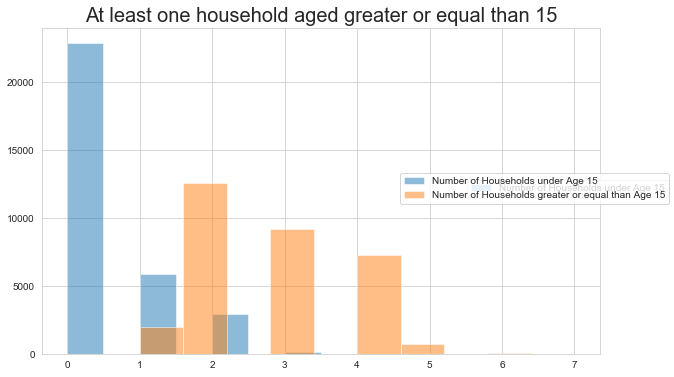

In [26]:
fig = plt.figure(figsize=(10,6))

fam = pd.DataFrame(happy, columns=['FAM1', 'FAM2'])

for col in fam.columns:
    plt.hist(fam[col], normed=False, alpha=0.5)
    fig.legend(labels=['Number of Households under Age 15','Number of Households greater or equal than Age 15'],loc=7,fontsize=10)
    plt.title('At least one household aged greater or equal than 15',fontsize=20)

애초에 15세 이상의 사람한테 묻는 것이니 애초에 15세 이상 가구원들이 더욱 많은 것은 당연하다!

### BIR변수

In [27]:
happy.BIR = 2014 - happy.BIR +1 
happy.rename(columns = {'BIR':'AGE'}, inplace = True)



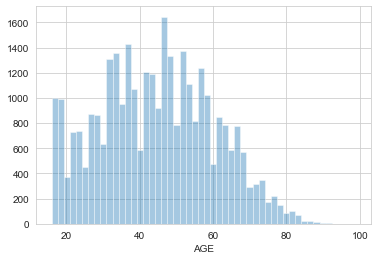

In [28]:
sns.distplot(happy.AGE,kde=False)

40대 중반이 가장 응답자들이 많은 듯하고 그 중심으로 양옆으로 줄어드는 모양. 적절히 조사한 듯하다

### Q4B변수! (종속변수)

Text(0.5, 1.0, 'Red: Mean, Green : Mean plus/minus 2sd')

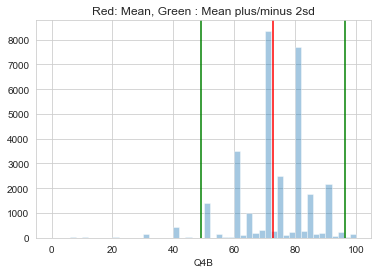

In [29]:
sns.distplot(happy.Q4B,kde=False)

mn = happy.Q4B.mean()
sd = happy.Q4B.std()

plt.axvline(mn,color='red')
plt.axvline(mn - 2*sd, color='green')
plt.axvline(mn + 2*sd, color='green')

plt.title('Red: Mean, Green : Mean plus/minus 2sd')

In [30]:
happy.Q4B.value_counts()

70    8318
80    7661
60    3426
75    2447
90    2140
      ... 
37       1
33       1
15       1
41       1
9        1
Name: Q4B, Length: 75, dtype: int64

- 심하게 skew나 bell shape를 위반하는 건 아닐 수는 있어도 아름답지 않은 분포 모양이다.

- 그 이유는 사람들 성향 상 10의 배수 혹은 5의 배수로 생각하기 때문이다! 이는 과학적으로 체감되지 않은 점수이며 사람들의 체감 행복지수이므로 감안해야 할 점이다.

- 다만 심한 outlier들은 손을 봐야 한다!

- 현재는 모델 피팅 이전이여서 outlier 제거가 불가능하나 이후에 모델피팅이 끝나면 사후 조치로써 Outlying Y Observations를 detect해내고 삭제할 수 있다. 

회귀분석 시간에 배운 Y outlier detection 방식 세가지이다.

### Methods of Detecting Outlying Y observations

1) Semi- studentized residuals $e_i* = \frac{e_i}{\sqrt(MSE)}$


2) Internally studentized residuals  $r_i* = \frac{e_i}{s_(e_i)} = \frac{e_i}{\sqrt MSE(1-h_{ii})}$

3) studentized Deleted Residuals $t_i  = \frac{d_i}{s_(d_i)} = e_i [\frac{n-p-1}{SSE(1-h_{ii})- e_i^2}]^{\frac{1}{2}} \sim t(n-p-1)$

### Q10 환경실천도

In [31]:
env = happy.loc[:,'Q10A1':'Q10A5']
happy.Q10A1 = env.mean(1)
happy.rename(columns = {'Q10A1':'Q10'}, inplace = True) #Q10A1의 column을 Q10으로 컬럼명 변경

#이제 환경실천도 구했으니 Q10A2,Q10A3,Q10A4 삭제가능
happy = happy.drop(['Q10A2','Q10A3','Q10A4','Q10A5'], axis=1)

### Q12  문화생활횟수


In [32]:
cult= happy.loc[:,'Q12A1' : 'Q12H1']
happy.Q12A1 = cult.sum(1)
happy.rename(columns = {'Q12A1':'Q12'}, inplace = True) #Q12 : 총 문화횟수!


#이제 문화생활횟수 구했으니 B1,C1... 다 삭제가능!
happy = happy.drop(['Q12B1','Q12C1','Q12D1','Q12E1','Q12F1','Q12G1','Q12H1'],axis=1)

### Q16A 유적지방문횟수


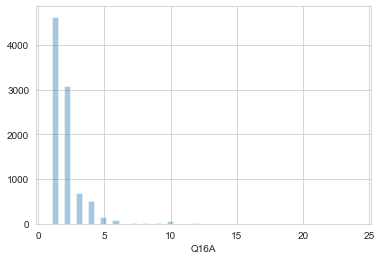

In [33]:
sns.distplot(happy.Q16A,kde=False)

### Q23 ) 자원봉사활동 횟수

RQ23A1,RQ23B1,RQ23C1,RQ23D1의 $\sum$


In [34]:
volu= happy.loc[:,'RQ23A1' : 'RQ23D1']
happy.RQ23A1 = volu.sum(1)
happy.rename(columns = {'RQ23A1':'Q23'}, inplace = True) #Q12 : 총 문화횟수!


#이제 문화생활횟수 구했으니 B1,C1... 다 삭제가능!
happy = happy.drop(['RQ23B1','RQ23C1','RQ23D1'],axis=1)

### Q42C2 통근시간


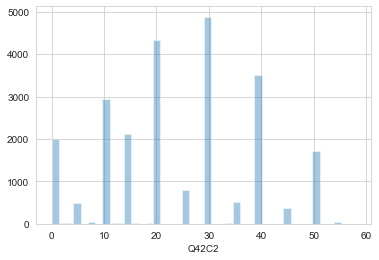

In [35]:
sns.distplot(happy.Q42C2,kde=False)

NA imputing을 인해서 0이 가장 많다. 제외하고는 bell모양의 curve가 잘 지켜진다.

In [36]:
happy.Q42C2[happy.Q42C2!=0].mean()

26.61322864837723

0분을 제외하고 통근시간은 평균 33분이다

### 차원이 많이 줄었는가?

In [37]:
happy.shape

# 네

(31848, 146)

## 4) 김진영: 데이터 결합 및 삭제, datatype 정리

## 안쓰기로 한 variable 삭제
- 'JEN', 'AGE', 'EDU', 'DE4', 'MAR', 'GU', 'DE8', 'JOB', 'FC', 'Q2A','Q3A2','Q3A3','Q3A4','Q3A5','Q3A6','Q3A7','Q3A8','Q3A9','Q3A10','Q3A11','Q12I', 'Q20A', 'Q20B1', 'Q20B2', 'Q20B3', 'Q20B4', 'Q20B5', 'Q44A', 'Q45A1','Q47'

In [38]:
happy=happy.drop(['JEN', 'AGE', 'EDU', 'DE4', 'MAR', 'GU', 'DE8', 'JOB', 'FC',  'Q2A','Q3A2','Q3A3','Q3A4','Q3A5','Q3A6','Q3A7','Q3A8','Q3A9','Q3A10','Q3A11','Q12I', 'Q20A', 'Q20B1', 'Q20B2', 'Q20B3', 'Q20B4', 'Q20B5', 'Q44A', 'Q45A1','Q47'],axis=1)

## 데이터 정제 및 전처리 (1)
### (이가은학우 자료 합치기)

### Q14

In [39]:
# Q14. 이가은학우 자료 불러오기
q14=pd.read_excel('C:/ESC2020_spring/finalproject/na/q14.xlsx')
q14.head()

,Unnamed: 0,Q14A1,Q14A2
0,0,4,1
1,1,1,3
2,2,1,7
3,3,1,7
4,4,3,1


In [40]:
# 결측치 채워진 column으로 대체 (2순위 무응답 -> 1순위와 동일하게)
happy['Q14A2']=q14['Q14A2']
happy['Q14A2'].isnull().sum()

0

### Q16

In [41]:
# Q16. 이가은학우 자료 불러오기
q16=pd.read_excel('C:/ESC2020_spring/finalproject/na/q16.xlsx')
q16.head()

,Unnamed: 0,0
0,0,1
1,1,0
2,2,1
3,3,2
4,4,2


In [42]:
# 결측치 채워진 column으로 대체 (방문한 적 없을 때 결측치인 것 0으로 대체)
happy['Q16A']=q16[0]
happy['Q16A'].isnull().sum()

0

### Q17

In [43]:
# Q17. 이가은학우 자료 불러오기
q17=pd.read_excel('C:/ESC2020_spring/finalproject/na/q17.xlsx')
q17.head()

,Unnamed: 0,Q17A1,Q17A2
0,0,1,10
1,1,1,10
2,2,5,6
3,3,6,5
4,4,5,6


In [44]:
# 결측치 채워진 column으로 대체 (2순위 무응답 -> 1순위와 동일하게)
happy[['Q17A1','Q17A2']]=q17[['Q17A1','Q17A2']]
happy['Q17A2'].isnull().sum()

0

### Q19

In [45]:
# Q19. 이가은학우 자료 불러오기
q19=pd.read_excel('C:/ESC2020_spring/finalproject/na/q19.xlsx')
q19.head()

,Unnamed: 0,Q19A1,Q19A2
0,0,6,10
1,1,10,6
2,2,8,4
3,3,10,3
4,4,4,10


In [46]:
# 결측치 채워진 column으로 대체 (2순위 무응답 -> 1순위와 동일하게)
happy[['Q19A1','Q19A2']]=q19[['Q19A1','Q19A2']]
happy['Q19A2'].isnull().sum()

0

### Q21

In [47]:
# Q21. 이가은학우 자료 불러오기
q21_a=pd.read_excel('C:/ESC2020_spring/finalproject/na/q21_a.xlsx')
q21_a.head()

,Unnamed: 0,0
0,0,0
1,1,0
2,2,1
3,3,1
4,4,1


In [48]:
# 가공된 column 새로 추가 (받은 평생교육의 형태 -> 평생교육 받은 여부)
happy['Q21A']=q21_a[0]

### Q21-1

In [49]:
# Q21-1. 이가은학우 자료 불러오기
q21_b=pd.read_excel('C:/ESC2020_spring/finalproject/na/q21_b.xlsx')
q21_b.head()

,Unnamed: 0,Q21B1,Q21B2
0,0,1,1
1,1,3,5
2,2,5,4
3,3,5,4
4,4,5,1


In [50]:
# 결측치 채워진 column으로 대체 (2순위 무응답 -> 1순위와 동일하게)
happy[['Q21B1','Q21B2']]=q21_b[['Q21B1','Q21B2']]
happy['Q21B2'].isnull().sum()

0

### Q24

In [51]:
# Q24. 이가은학우 자료 불러오기
q24=pd.read_excel('C:/ESC2020_spring/finalproject/na/q24.xlsx')
q24.head()

,Unnamed: 0,Q24
0,0,0
1,1,1
2,2,1
3,3,1
4,4,1


In [52]:
# 가공된 column으로 대체 (자원봉사 참여의향 정도 -> 참여의향 여부)
happy['Q24']=q24['Q24']

### Q25

In [53]:
# Q25. 이가은학우 자료 불러오기
q25=pd.read_excel('C:/ESC2020_spring/finalproject/na/q25.xlsx')
q25.head()

,Unnamed: 0,Q25A1,Q25A2
0,0,2,4
1,1,1,2
2,2,5,6
3,3,6,5
4,4,6,5


In [54]:
# 결측치 채워진 column으로 대체 (2순위 무응답 -> 1순위와 동일하게)
happy[['Q25A1','Q25A2']]=q25[['Q25A1','Q25A2']]
happy['Q25A2'].isnull().sum()

0

### Q26

In [55]:
# Q26. 이가은학우 자료 불러오기
q26=pd.read_excel('C:/ESC2020_spring/finalproject/na/q26.xlsx')
q26.head()

,Unnamed: 0,0
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [56]:
# 가공된 column 새로 추가 (기부 형태 -> 기부 했는지 여부)
happy['Q26']=q26[0]

### Q31

In [57]:
# Q31. 이가은학우 자료 불러오기
q31=pd.read_excel('C:/ESC2020_spring/finalproject/na/q31.xlsx')
q31.head()

,Unnamed: 0,Q31A1,Q31A2
0,0,1,2
1,1,1,6
2,2,8,5
3,3,8,5
4,4,5,8


In [58]:
# 결측치 채워진 column으로 대체 (2순위 무응답 -> 1순위와 동일하게)
happy[['Q31A1','Q31A2']]=q31[['Q31A1','Q31A2']]
happy['Q31A2'].isnull().sum()

0

### Q41

In [59]:
# Q41. 이가은학우 자료 불러오기
q41=pd.read_excel('C:/ESC2020_spring/finalproject/na/q41.xlsx')
q41.head()

,Unnamed: 0,Q41
0,0,7
1,1,4
2,2,6
3,3,7
4,4,7


In [60]:
# 가공된 column으로 대체 (1~5: 진보정도, 6~10: 보수정도 -> 0: 매우진보 ~ 10: 매우보수)
happy['Q41']=q41['Q41']

### Q42

In [61]:
# Q42. 이가은학우 자료 불러오기
q42=pd.read_excel('C:/ESC2020_spring/finalproject/na/q42.xlsx')
q42.head()

,Unnamed: 0,Q42
0,0,1
1,1,0
2,2,1
3,3,1
4,4,1


In [62]:
# 가공된 column으로 대체 (1:통학,2:통근 -> 1:통학or통근)
happy['Q42']=q42['Q42']

### Q42-3

In [63]:
# Q42-3. 이가은학우 자료 불러오기
q42_c=pd.read_excel('C:/ESC2020_spring/finalproject/na/q42_c.xlsx')
q42_c.head()

,Unnamed: 0,0
0,0,60
1,1,0
2,2,30
3,3,30
4,4,20


In [64]:
# 가공된 column으로 대체 (통학/통근 안하는 경우 통학/통근시간 0으로 반영)
happy['Q42C2']=q42_c[0]

### Q45

In [65]:
# Q45. 이가은학우 자료 불러오기
q45=pd.read_excel('C:/ESC2020_spring/finalproject/na/q45.xlsx')
q45.head()

,Unnamed: 0,Q45A1,Q45A2,Q45A3
0,0,4,3,4
1,1,4,3,4
2,2,4,4,3
3,3,5,5,4
4,4,4,4,3


In [66]:
# 가공된 column으로 대체 (9: 이용하지 않음 -> 평균으로 대체)
happy[['Q45A2','Q45A3']]=q45[['Q45A2','Q45A3']]

### Q47-3

In [67]:
# Q47-3. 이가은학우 자료 불러오기
q47=pd.read_excel('C:/ESC2020_spring/finalproject/na/q47.xlsx')
q47.head()

,Unnamed: 0,0
0,0,3
1,1,0
2,2,3
3,3,0
4,4,0


In [68]:
# 가공된 column으로 대체 (0:무직, 1~5 직업만족정도)
happy['Q47C']=q47[0]

## 데이터 정제 및 전처리 (2)
### (박태석학우 자료 합치기)

### Q30

In [69]:
# 가공된 column 새로 추가 
happy['Q30Mean34']=Q30Mean34

### Q32

In [70]:
# 가공된 column 새로 추가 
happy['Q32Mean12']=Q32Mean12
happy['Q32Mean67']=Q32Mean67

### Q33

In [71]:
# 가공된 column 새로 추가 
happy['Q33Mean12']=Q33Mean12
happy['Q33Mean45']=Q33Mean45

### Q36-1

In [72]:
# 가공된 column 새로 추가 
happy['Q36Mean']=Q36Mean

### Q43

In [73]:
# 가공된 column 새로 추가 
happy['Q43Mean']=Q43Mean

### Q46

In [74]:
# 가공된 column 새로 추가 
happy['Q46Mean235']=Q46Mean235

In [75]:
# 합치기 전 columns 삭제
happy=happy.drop(['Q30A3', 'Q30A4', 'Q32A1', 'Q32A2', 'Q32A6', 'Q32A7', 'Q33A1', 'Q33A2', 'Q33A4', 'Q33A5', 'Q36A1'
                  ,'Q36A2','Q43A1','Q43A2', 'Q46A2', 'Q46A3', 'Q46A5'], axis = 1)

## 데이터 정제 및 전처리 (3)
### (누락된 자료)

### Q2

In [76]:
# 결측치 0으로 채우기 (축제참여 X = 0)
happy['Q2B']=happy['Q2B'].fillna(0)

### Q3

In [77]:
happy['Q3A1'].shape

(31848,)

In [78]:
# 새로운 Q3A1 가공
q3_nd=np.zeros(31848)
q3_nd.shape

(31848,)

In [79]:
i=0
for n in happy['Q3A1']:
    if n==12:
        q3_nd[i]=0
    else:
        q3_nd[i]=1
    i+=1

In [80]:
q3=pd.DataFrame(q3_nd,columns=['Q3A1'])
q3.head()

,Q3A1
0,1.0
1,1.0
2,1.0
3,1.0
4,0.0


In [81]:
# 가공된 column으로 대체 (단체활동 참여 형태 -> 참여여부)
happy['Q3A1']=q3['Q3A1']

## 데이터 타입 정리

## nominal
'HTYP','HLIV','REL','RLI','Q1','Q2B','Q3A1','Q14A1','Q17A1','Q17A2','Q18','Q19A1','Q19A2','Q21A','Q21B1','Q21B2','Q24','Q25A1','Q25A2','Q26','Q31A1','Q31A2','Q35','Q38','Q39','Q42','Q44','Q47C','DE1','DE2','DE3','DE5','DE6','DE7','DE9'


## ordinal
'INC','Q2','Q5A1','Q5A2','Q5A3','Q5A4','Q6A1','Q6A2','Q6A3','Q6A4','Q6A5','Q6A6','Q6A7','Q6A8','Q6A9','Q6A10','Q6A11','Q6A12','Q6A13','Q7','Q8','Q9','Q10','Q11','Q13','Q13A','Q15','Q20','Q22','Q27','Q28','Q29A1','Q29A2','Q29A3','Q29A4','Q30A1','Q30A2','Q30Mean34','Q30A5','Q32Mean12','Q32A3','Q32A4','Q32A5','Q32Mean67','Q33Mean12','Q33A3','Q33Mean45','Q33A6','Q33A7','Q33A8','Q33A9','Q36','Q36Mean','Q37','Q40','Q41','Q43Mean','Q45A2','Q45A3','Q46A1','Q46Mean235','Q46A4','Q48','Q49'

## numerical
'FAM1','FAM2','AGE','Q12A1','Q12I1','Q16A','Q23','Q34','Q42C2'

In [82]:
# data type: nominal로 변환
nominal_list=['HTYP','HLIV','REL','RLI','Q1','Q2B','Q3A1','Q14A1','Q17A1','Q17A2','Q18','Q19A1','Q19A2','Q21A','Q21B1','Q21B2','Q24','Q25A1','Q25A2','Q26','Q31A1','Q31A2','Q35','Q38','Q39','Q42','Q44','Q47C','DE1','DE2','DE3','DE5','DE6','DE7','DE9']
happy[nominal_list]=happy[nominal_list].astype('category')

In [83]:
#data type: ordinal로 변환
ordinal_dtype=pd.api.types.CategoricalDtype(ordered=True)
ordinal_dtype
ordinal_list=['INC','Q2','Q5A1','Q5A2','Q5A3','Q5A4','Q6A1','Q6A2','Q6A3','Q6A4','Q6A5','Q6A6','Q6A7','Q6A8','Q6A9','Q6A10','Q6A11','Q6A12','Q6A13','Q7','Q8','Q9','Q10','Q11','Q13','Q13A','Q15','Q20','Q22','Q27','Q28','Q29A1','Q29A2','Q29A3','Q29A4','Q30A1','Q30A2','Q30Mean34','Q30A5','Q32Mean12','Q32A3','Q32A4','Q32A5','Q32Mean67','Q33Mean12','Q33A3','Q33Mean45','Q33A6','Q33A7','Q33A8','Q33A9','Q36','Q36Mean','Q37','Q40','Q41','Q43Mean','Q45A2','Q45A3','Q46A1','Q46Mean235','Q46A4','Q48','Q49']
happy[ordinal_list]=happy[ordinal_list].astype(ordinal_dtype)

In [84]:
happy.shape

(31848, 109)

In [85]:
happy.to_csv("Seoul_Happiness_2014_train_05272343.csv")

# Model Building

In [86]:
from scipy.stats import norm
import math
import sklearn.linear_model as lm
from sklearn.preprocessing import PolynomialFeatures

## LASSO

In [87]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

## Principal Component Regression

## Partial Least Square Regression

## FA -> Some Regression

## Support Vector Machine Regression

In [88]:
import geopandas as gpd
import pickle

ModuleNotFoundError: No module named 'geopandas'